<a href="https://colab.research.google.com/github/WTDFernando/Resume-Analyser/blob/main/BERT_7_Categories_Balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Transformers installation
! pip install transformers
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.7 MB/s eta 0:00:00


In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_Data.csv")
df_train.head()

,Category,Resume
0,ACCOUNTANT,ACCOUNTANT Professional Summary...
1,ACCOUNTANT,ACCOUNTANT Summary Innovat...
2,ACCOUNTANT,ACCOUNTANT Highlights ...
3,ACCOUNTANT,ACCOUNTANT Professional Sum...
4,ACCOUNTANT,ACCOUNTANT Summary To pursue...


In [ ]:
#convert to lower case
df_train["Category"] = df_train["Category"].str.lower()
df_train.head()

,Category,Resume
0,accountant,ACCOUNTANT Professional Summary...
1,accountant,ACCOUNTANT Summary Innovat...
2,accountant,ACCOUNTANT Highlights ...
3,accountant,ACCOUNTANT Professional Sum...
4,accountant,ACCOUNTANT Summary To pursue...


In [ ]:
print(df_train["Category"])

0           accountant
1           accountant
2           accountant
3           accountant
4           accountant
             ...      
19524    web developer
19525    web developer
19526    web developer
19527    web developer
19528    web developer
Name: Category, Length: 19529, dtype: object


In [ ]:
cats = df_train["Category"].value_counts()
#print(cats)
sel_cats = cats[cats > 1000]
print(sel_cats)
wanted_columns = sel_cats.index
print(wanted_columns)

software engineer - backend    3377
web developer                  3110
systems_administrator          2349
project_manager                2335
database_administrator         2223
security_analyst               1561
network_administrator          1466
Name: Category, dtype: int64
Index(['software engineer - backend', 'web developer', 'systems_administrator',
       'project_manager', 'database_administrator', 'security_analyst',
       'network_administrator'],
      dtype='object')


In [ ]:
print ('size of the train file is', df_train.shape)

size of the train file is (19529, 2)


In [ ]:
WANTED_COLUMNS = list(wanted_columns)
print(WANTED_COLUMNS)

['software engineer - backend', 'web developer', 'systems_administrator', 'project_manager', 'database_administrator', 'security_analyst', 'network_administrator']


In [ ]:
df_train = df_train[df_train["Category"].isin(WANTED_COLUMNS)]
df_train.head()

,Category,Resume
1463,database_administrator,Database Administrator Database Administrator ...
1464,database_administrator,Database Administrator Database Administrator ...
1465,database_administrator,Oracle Database Administrator Oracle Database ...
1466,database_administrator,Amazon Redshift Administrator and ETL Develope...
1467,database_administrator,Scrum Master Scrum Master Scrum Master Richmon...


In [ ]:
#reset index
df_train.reset_index(drop = True, inplace = True)
df_train.head()

,Category,Resume
0,database_administrator,Database Administrator Database Administrator ...
1,database_administrator,Database Administrator Database Administrator ...
2,database_administrator,Oracle Database Administrator Oracle Database ...
3,database_administrator,Amazon Redshift Administrator and ETL Develope...
4,database_administrator,Scrum Master Scrum Master Scrum Master Richmon...


In [ ]:
unique_labels = list(df_train["Category"].unique())
print(unique_labels)

LIMIT = 1400

df_balanced = pd.DataFrame()

for cat_labels in unique_labels:
  df_sample = df_train[df_train["Category"] == cat_labels]
  df_sample = df_sample.sample(frac = 1).reset_index(drop = True)
  limit = min(len(df_sample), LIMIT)
  print("Limit: {}".format(limit))
  df_balanced = df_balanced.append(df_sample.iloc[:limit, :])

df_balanced.head()

['database_administrator', 'network_administrator', 'project_manager', 'security_analyst', 'software engineer - backend', 'systems_administrator', 'web developer']
Limit: 1400
Limit: 1400
Limit: 1400
Limit: 1400
Limit: 1400
Limit: 1400
Limit: 1400


<ipython-input-12-9dfc3af58862>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_sample.iloc[:limit, :])
<ipython-input-12-9dfc3af58862>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_sample.iloc[:limit, :])
<ipython-input-12-9dfc3af58862>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_sample.iloc[:limit, :])
<ipython-input-12-9dfc3af58862>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced = df_balanced.append(df_sample.iloc[:limit, :])
<ipython-input-12-9dfc3af58862>:13: FutureWarning: The frame.append method i

,Category,Resume
0,database_administrator,Sr. Oracle DBA Sr. Oracle DBA Sr. Oracle DBA -...
1,database_administrator,Lead Snr. DBA Lead Snr. DBA Lead Snr. DBA - Gr...
2,database_administrator,SQL Server Database Specialist/DBA SQL Server ...
3,database_administrator,Database Analyst III Database Analyst III Ambo...
4,database_administrator,Database Administrator Database Administrator ...


In [ ]:
for category_id, category_name in enumerate(unique_labels):
    print(f"{category_id}: {category_name},")


0: database_administrator,
1: network_administrator,
2: project_manager,
3: security_analyst,
4: software engineer - backend,
5: systems_administrator,
6: web developer,


In [ ]:
df_balanced["Category"].value_counts()

database_administrator         1400
network_administrator          1400
project_manager                1400
security_analyst               1400
software engineer - backend    1400
systems_administrator          1400
web developer                  1400
Name: Category, dtype: int64

In [ ]:
df_train = df_balanced.copy()
df_train.reset_index(drop = True, inplace = True)

In [ ]:
df_train.columns

Index(['Category', 'Resume'], dtype='object')

In [ ]:
df_train.head()

,Category,Resume
0,database_administrator,Sr. Oracle DBA Sr. Oracle DBA Sr. Oracle DBA -...
1,database_administrator,Lead Snr. DBA Lead Snr. DBA Lead Snr. DBA - Gr...
2,database_administrator,SQL Server Database Specialist/DBA SQL Server ...
3,database_administrator,Database Analyst III Database Analyst III Ambo...
4,database_administrator,Database Administrator Database Administrator ...


In [ ]:
labels = df_train["Category"].unique()
labels.sort()
print(labels)

['database_administrator' 'network_administrator' 'project_manager'
 'security_analyst' 'software engineer - backend' 'systems_administrator'
 'web developer']


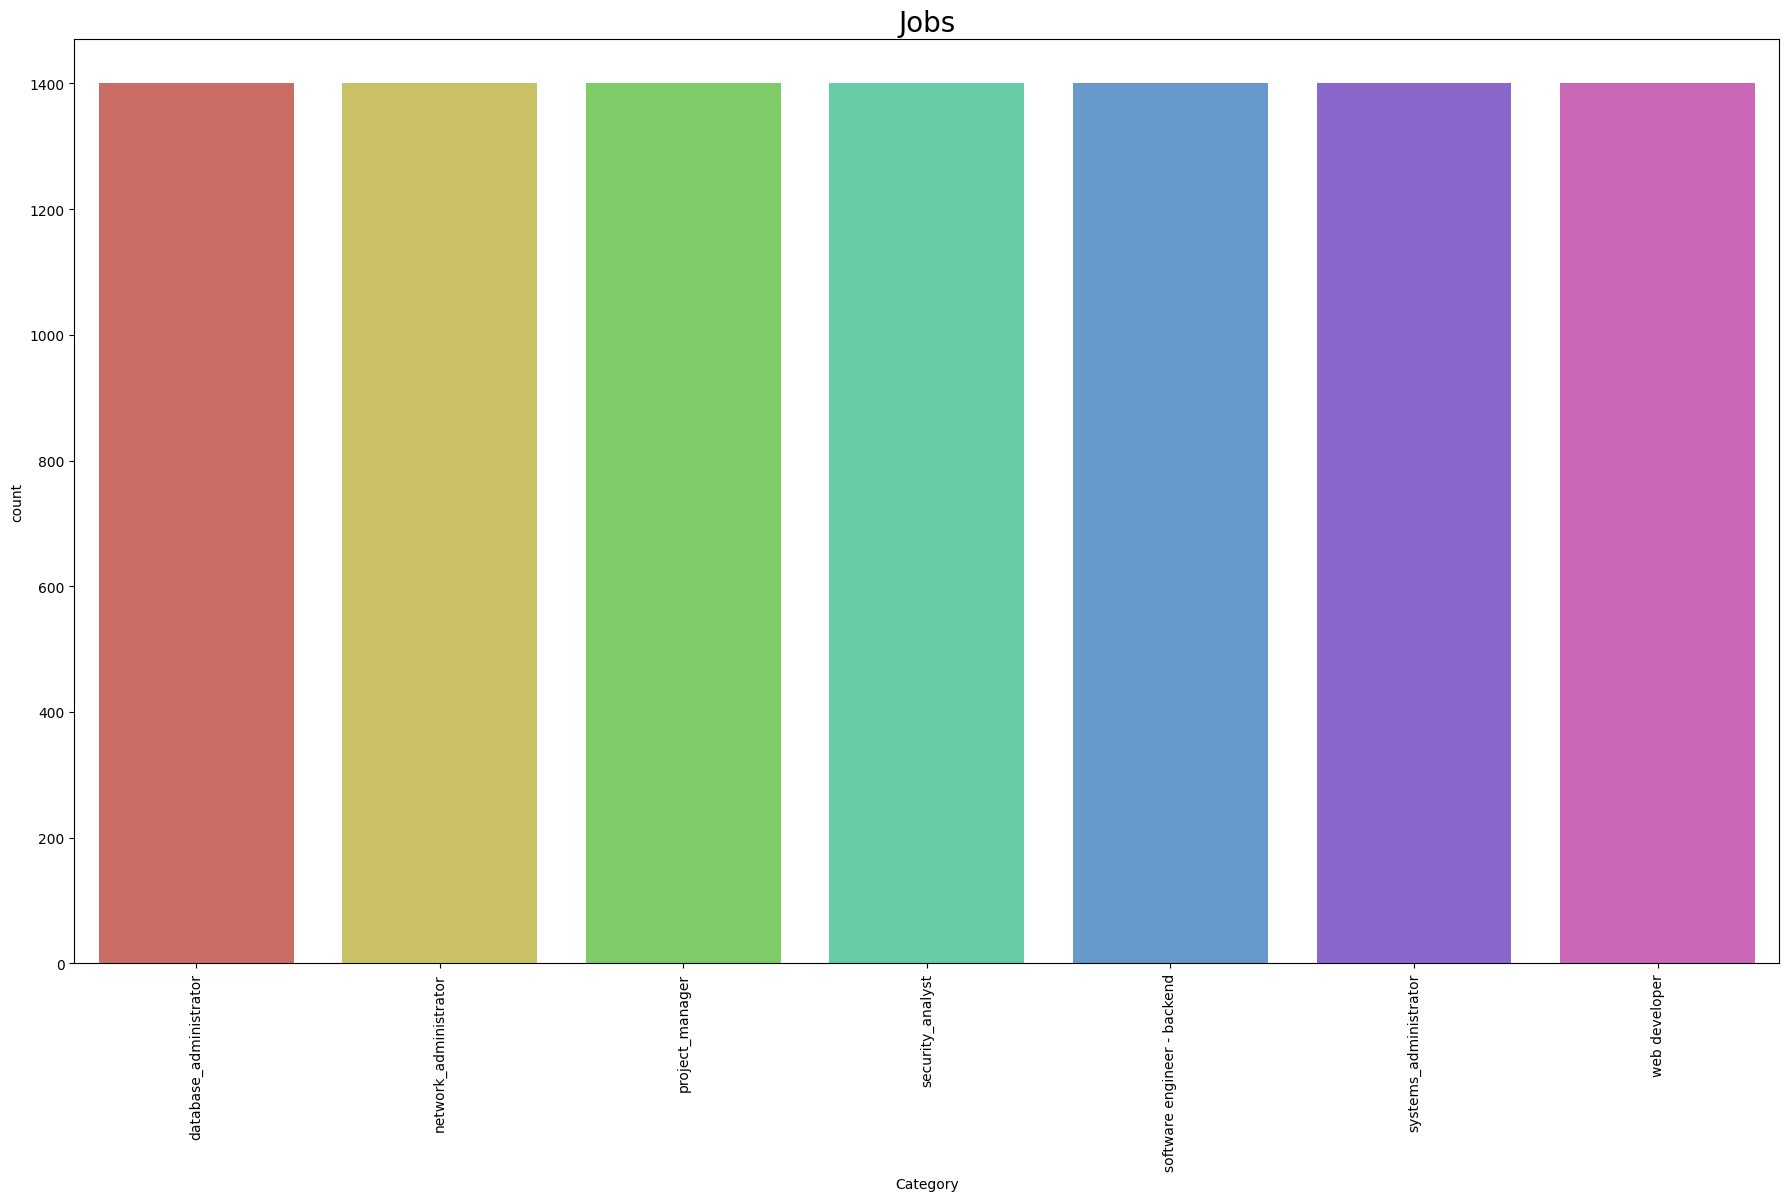

In [ ]:
plt.figure(figsize = (22, 12))
sns.countplot(x = 'Category', data = df_train, palette = 'hls')
plt.title('Jobs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
print ('size of the train file after splitting the dataset is', df_train.shape)

size of the train file after splitting the dataset is (9800, 2)


In [ ]:
#getting the list of text values
data_list = df_train["Resume"].to_list()

## Preprocessing functions

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

STOP_WORDS = list(stopwords.words('english'))

contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he has",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has",
    "i'd": "I had",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it has",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she has",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who has",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def extend_contractions_and_remove_SW(sentence):
    words = sentence.split(" ")
    processed_words = [contractions.get(word, word) for word in words]
    remove_stop_words = [word for word in processed_words if word not in STOP_WORDS]
    return " ".join(list(map(str, remove_stop_words)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_processor(text):
    import re
    #convert the text to lower
    text = text.lower()
    #remove urls
    text = re.sub(r"(http|https){1}://\S+", "", text)
    #remove content in brackets
    text = re.sub(r"\(\S+\)", "", text)
    #remove hashtags
    text = re.sub(r"#[\S]+", "", text)
    #remove all the non alphanumeric characters including punctuations.
    #but does not remove ' since contractions must be extended
    text = re.sub(r"[^\w\s ']+", "", text)
    #extend the contractions and remove stop words
    text = extend_contractions_and_remove_SW(text)
    #then remnove '
    text = re.sub(r"'","", text)
    #remove numbers
    text = re.sub(r"[\d]+", "", text)
    #replace breaks
    text = re.sub(r"\n", "", text)
    #remove __ occurences
    text = re.sub(r"[_]+", "", text)

    #removing emojis from the text
    regrex_pattern = re.compile(pattern = "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"  # flags (iOS)
                            "]+", flags = re.UNICODE)
    text = regrex_pattern.sub('', text)
    return text

In [ ]:
%%time
#process the texts
processed_texts = list(map(text_processor, data_list))

CPU times: user 37.1 s, sys: 76.1 ms, total: 37.2 s
Wall time: 52.4 s


In [ ]:
#save texts
df = df_train.copy()
df["clean_resume"] = processed_texts

#check what are the empty strings after preprocesisng
empty_ids = [index for index, row in enumerate(df["clean_resume"].to_list()) if row == "" or row == "  "]
print("Length of empty IDs: ",len(empty_ids))

Length of empty IDs:  0


In [ ]:
df.head()

,Category,Resume,clean_resume
0,database_administrator,Sr. Oracle DBA Sr. Oracle DBA Sr. Oracle DBA -...,sr oracle dba sr oracle dba sr oracle dba cit...
1,database_administrator,Lead Snr. DBA Lead Snr. DBA Lead Snr. DBA - Gr...,lead snr dba lead snr dba lead snr dba great ...
2,database_administrator,SQL Server Database Specialist/DBA SQL Server ...,sql server database specialistdba sql server d...
3,database_administrator,Database Analyst III Database Analyst III Ambo...,database analyst iii database analyst iii ambo...
4,database_administrator,Database Administrator Database Administrator ...,database administrator database administrator ...


In [ ]:
#drop the empty ids
print("Before dropping: {}".format(df.shape))
df.drop(index = empty_ids, inplace = True)
print("After dropping: {}".format(df.shape))

Before dropping: (9800, 3)
After dropping: (9800, 3)


In [ ]:
df.isnull().sum()

Category        0
Resume          0
clean_resume    0
dtype: int64

In [ ]:
df["Category"] = df["Category"].str.lower()
df.head()

,Category,Resume,clean_resume
0,database_administrator,Sr. Oracle DBA Sr. Oracle DBA Sr. Oracle DBA -...,sr oracle dba sr oracle dba sr oracle dba cit...
1,database_administrator,Lead Snr. DBA Lead Snr. DBA Lead Snr. DBA - Gr...,lead snr dba lead snr dba lead snr dba great ...
2,database_administrator,SQL Server Database Specialist/DBA SQL Server ...,sql server database specialistdba sql server d...
3,database_administrator,Database Analyst III Database Analyst III Ambo...,database analyst iii database analyst iii ambo...
4,database_administrator,Database Administrator Database Administrator ...,database administrator database administrator ...


In [ ]:
NUM_CLASSES = len(df["Category"].unique())
print("Number of classes: {}".format(NUM_CLASSES))

Number of classes: 7


In [ ]:
df["label"] = pd.factorize(df["Category"], sort = True)[0]
df.head()

,Category,Resume,clean_resume,label
0,database_administrator,Sr. Oracle DBA Sr. Oracle DBA Sr. Oracle DBA -...,sr oracle dba sr oracle dba sr oracle dba cit...,0
1,database_administrator,Lead Snr. DBA Lead Snr. DBA Lead Snr. DBA - Gr...,lead snr dba lead snr dba lead snr dba great ...,0
2,database_administrator,SQL Server Database Specialist/DBA SQL Server ...,sql server database specialistdba sql server d...,0
3,database_administrator,Database Analyst III Database Analyst III Ambo...,database analyst iii database analyst iii ambo...,0
4,database_administrator,Database Administrator Database Administrator ...,database administrator database administrator ...,0


In [ ]:
df["clean_resume"].to_list()[0]

'sr oracle dba sr oracle dba sr oracle dba  citi group irving tx  years experience oracle database administration linux unix windows platforms experience include installation configuration  upgrades space management system maintenance cloning patching data replication database security troubleshooting database design performance monitoring tuning backup recovery also includes rac asm data guard golden gate data pump grid control experience   excellent experience installation configuration oracle c ig g unixlinux windows environment  upgraded databases i g g g g c various platforms  managed databases range gb tb  proficient database administration activities user management space management monitoring creating database managing oracle instance database security materialized views  worked performance optimization large objects lob blob clob monitoring redoes generation increasing log buffer size blocksize changing archiving procedures query tuning using statspack  tkprof oem  performance

In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizerFast
import numpy as np
from tensorflow.keras.utils import to_categorical

# Preprocess data
X = list(df["clean_resume"])
y = to_categorical(list(df['label']), NUM_CLASSES)
#y = list(df["6_way_label"])
"""
y = np.zeros((len(X),2))
for index in range(0,len(y)):
  y[index,data_frame["Label"].iloc[index]] = 1
"""

train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2)
train_model_X, test_texts, train_model_y, test_labels = train_test_split(X, y, test_size=0.2)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_model_X, train_model_y, test_size=0.2)

In [ ]:
def batch_encode(tokenizer, texts, batch_size=256, max_length=128):
    """""""""
    A function that encodes a batch of texts and returns the texts'
    corresponding encodings and attention masks that are ready to be fed
    into a pre-trained transformer model.

    Input:
        - tokenizer:   Tokenizer object from the PreTrainedTokenizer Class
        - texts:       List of strings where each string represents a text
        - batch_size:  Integer controlling number of texts in a batch
        - max_length:  Integer controlling max number of words to tokenize in a given text
    Output:
        - input_ids:       sequence of texts encoded as a tf.Tensor object
        - attention_mask:  the texts' attention mask encoded as a tf.Tensor object
    """""""""

    input_ids = []
    attention_mask = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding="max_length", #implements dynamic padding
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs['input_ids'])
        attention_mask.extend(inputs['attention_mask'])


    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

In [ ]:
len (train_texts)

6272

In [ ]:
len(train_labels)

6272

In [ ]:
import tensorflow as tf
# Instantiate DistilBERT tokenizer...we use the Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Encode X_train
X_train_ids, X_train_attention = batch_encode(tokenizer, train_texts)

# Encode X_valid
X_valid_ids, X_valid_attention = batch_encode(tokenizer, val_texts)

# Encode X_test
X_test_ids, X_test_attention = batch_encode(tokenizer, test_texts)

In [ ]:
index = 167

print(X_train_ids[index])
print ("\n\n")
print(X_train_attention[index])

tf.Tensor(
[  101  2897  8911  2897  8911 22954 11333  9362  2147  2149 11194  2147
  3325  2897  8911  2533  3639 22954 11333  2233  2556  3710  9949  8911
  5506 10762  3589 17865  3640  8013  2490  9949 17502  2897  3001  2986
  8525  2638  9949  2291  8051  4007  4385  3623  3001  2836  2933 16500
  2434  2047  7085  4493  4007  2897  2968  5682  2933 16500  2015  8051
 13134  1998  2953 18739  2933 26021  3941  1998  2953  2291 21423  3073
  8272  5537 19940  7276  2609  5269  4287  3934  6503  3223  3116 11100
 29304  3471  8567  2147  2236  8606  2149  2390  5658  9006  2149  2390
 19960  9006  5003 12458  6043 16449  2015  7040  4488  3105  4972 16911
  8689  3325 10663  5866  2897 11783  8059  4007  3471 17841  3020  4075
  8606 25453  2968  3223  4506  8146  9034   102], shape=(128,), dtype=int32)



tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [ ]:
def build_model(transformer, base_learning_rate, max_length=128):
    """
    Template for building a model off of the BERT or DistilBERT architecture
    for a binary classification task.

    Input:
      - transformer:  a base Hugging Face transformer model object (BERT or DistilBERT)
                      with no added classification head attached.
      - max_length:   integer controlling the maximum number of encoded tokens
                      in a given sequence.

    Output:
      - model:        a compiled tf.keras.Model with added classification layers
                      on top of the base pre-trained model architecture.
    """
    params = {'LAYER_DROPOUT': 0.2,
              'RANDOM_STATE': 100}

    # Define weight initializer with a random seed to ensure reproducibility
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=100)

    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,),
                                            name='input_ids',
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,),
                                                  name='input_attention',
                                                  dtype='int32')
      # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]

    # We only care about DistilBERT's output for the [CLS] token, which is located
    # at index 0.  Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]

    D1 = tf.keras.layers.Dropout(params['LAYER_DROPOUT'],
                                 seed=params['RANDOM_STATE']
                                )(cls_token)

    X = tf.keras.layers.Dense(256,
                              activation='relu',
                              kernel_initializer=weight_initializer,
                              bias_initializer='zeros'
                              )(D1)

    D2 = tf.keras.layers.Dropout(params['LAYER_DROPOUT'],
                                 seed=params['RANDOM_STATE']
                                )(X)
    X = tf.keras.layers.Dense(32,
                              activation='relu',
                              kernel_initializer=weight_initializer,
                              bias_initializer='zeros'
                              )(D2)

    D3 = tf.keras.layers.Dropout(params['LAYER_DROPOUT'],
                                 seed=params['RANDOM_STATE']
                                )(X)

    # Define a single node that makes up the output layer (for binary classification)
    print(NUM_CLASSES)
    output = tf.keras.layers.Dense(NUM_CLASSES,
                                   activation='softmax',
                                   kernel_initializer=weight_initializer,  # CONSIDER USING CONSTRAINT
                                   bias_initializer='zeros'
                                   )(D3)

    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)

    # Compile the model
    model.compile(tf.keras.optimizers.Adam(lr=base_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# The bare, pretrained DistilBERT transformer model outputting raw hidden-states
# and without any specific head on top.
from transformers import TFDistilBertModel, DistilBertConfig
config = DistilBertConfig(dropout=0.2,
                          attention_dropout=0.2,
                          output_hidden_states=True)
distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Freeze DistilBERT layers to preserve pre-trained weights
for layer in distilBERT.layers:
    layer.trainable = False

# Build model
base_learning_rate = 0.05

model = build_model(distilBERT, base_learning_rate)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


7
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 input_attention (InputLaye  [(None, 128)]                0         []                            
 r)                                                                                               
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 stilBertModel)              den_state=(None, 128, 768)   0          'input_attention[0][0]']     
                             , hidden_states=((None, 12                                     

In [ ]:
# @title
# Train the model
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

epochs_value = 20
train_history1 = model.fit(
    x = [X_train_ids, X_train_attention],
    y = train_labels,
    epochs = epochs_value,
    batch_size = 256,
    validation_data = ([X_valid_ids, X_valid_attention], val_labels),
    verbose='auto'
)

Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 0.5101 - accuracy: 0.1789 - val_loss: 0.3831 - val_accuracy: 0.4337
Epoch 2/20
25/25 [==============================] - 37s 2s/step - loss: 0.4106 - accuracy: 0.2923 - val_loss: 0.3265 - val_accuracy: 0.5281
Epoch 3/20
25/25 [==============================] - 34s 1s/step - loss: 0.3572 - accuracy: 0.4326 - val_loss: 0.2809 - val_accuracy: 0.6460
Epoch 4/20
25/25 [==============================] - 37s 2s/step - loss: 0.3167 - accuracy: 0.5163 - val_loss: 0.2437 - val_accuracy: 0.7239
Epoch 5/20
25/25 [==============================] - 34s 1s/step - loss: 0.2879 - accuracy: 0.5697 - val_loss: 0.2192 - val_accuracy: 0.7557
Epoch 6/20
25/25 [==============================] - 38s 2s/step - loss: 0.2707 - accuracy: 0.6063 - val_loss: 0.2087 - val_accuracy: 0.7506
Epoch 7/20
25/25 [==============================] - 37s 2s/step - loss: 0.2554 - accuracy: 0.6344 - val_loss: 0.1970 - val_accuracy: 0.7474
Epoch 8/20
25/25 [==

In [ ]:
prediction = model.predict([X_valid_ids, X_valid_attention])

49/49 [==============================] - 7s 132ms/step


In [ ]:
prediction[0]

array([3.3011539e-03, 8.7219226e-04, 6.0883318e-03, 9.8692143e-01,
       3.0322355e-04, 7.5514748e-04, 1.7586268e-03], dtype=float32)

In [ ]:
labels = np.argmax(prediction, axis = 1)
print(labels)

[3 5 6 ... 3 6 2]


In [ ]:
true_labels = np.argmax(val_labels, axis = 1)
print(true_labels)

[2 5 6 ... 2 6 2]


In [ ]:
axis_labels = list(df["Category"].unique())
axis_labels.sort()
print(axis_labels)
print(len(axis_labels))

['database_administrator', 'network_administrator', 'project_manager', 'security_analyst', 'software engineer - backend', 'systems_administrator', 'web developer']
7


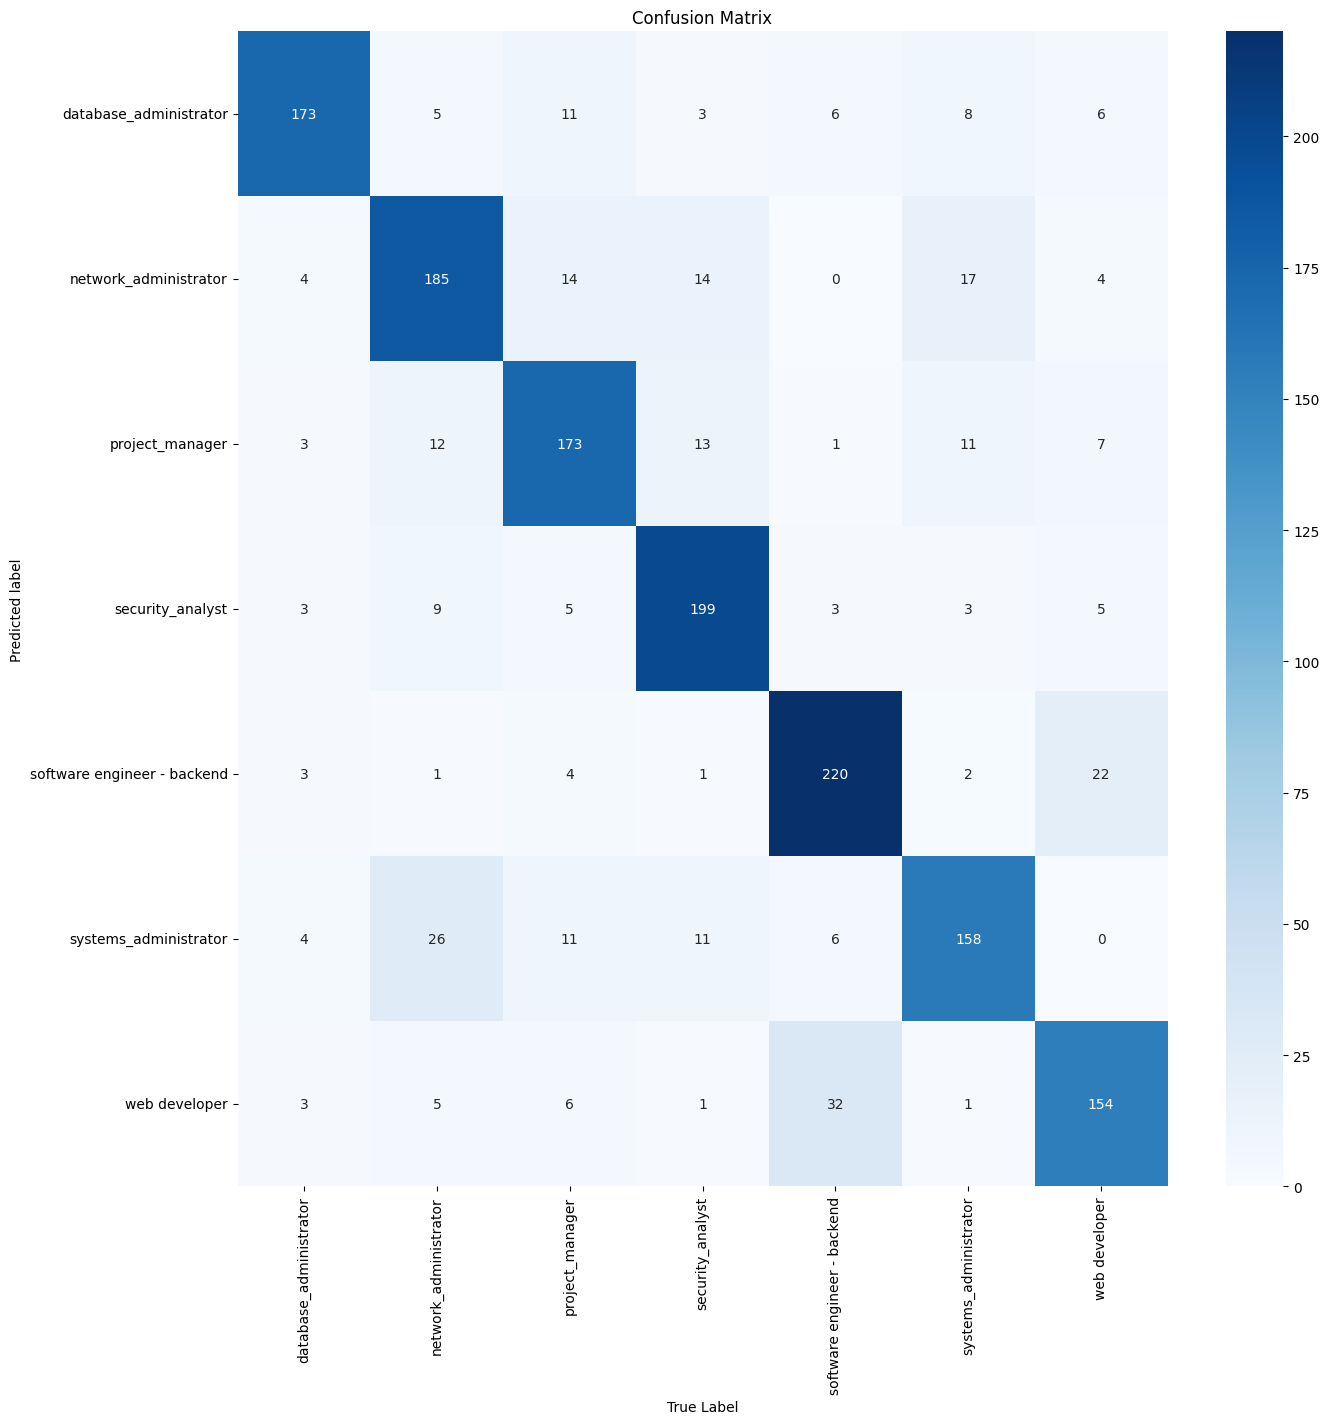

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix(true_labels, labels), annot = True, fmt = 'g', cmap = "Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.title("Confusion Matrix")
plt.xlabel("True Label")
plt.ylabel("Predicted label")
plt.show()

In [ ]:
# @title
from sklearn.metrics import classification_report

print(classification_report(true_labels, labels))

              precision    recall  f1-score   support

           0       0.90      0.82      0.85       212
           1       0.76      0.78      0.77       238
           2       0.77      0.79      0.78       220
           3       0.82      0.88      0.85       227
           4       0.82      0.87      0.84       253
           5       0.79      0.73      0.76       216
           6       0.78      0.76      0.77       202

    accuracy                           0.80      1568
   macro avg       0.81      0.80      0.80      1568
weighted avg       0.81      0.80      0.80      1568



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, labels))

              precision    recall  f1-score   support

           0       0.90      0.82      0.85       212
           1       0.76      0.78      0.77       238
           2       0.77      0.79      0.78       220
           3       0.82      0.88      0.85       227
           4       0.82      0.87      0.84       253
           5       0.79      0.73      0.76       216
           6       0.78      0.76      0.77       202

    accuracy                           0.80      1568
   macro avg       0.81      0.80      0.80      1568
weighted avg       0.81      0.80      0.80      1568



In [ ]:
from sklearn.metrics import classification_report
from PIL import Image, ImageDraw, ImageFont

# Generate the classification report
report = classification_report(true_labels, labels)

# Create an image with a white background
image = Image.new('RGB', (800, 600), color='white')
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

# Split the classification report into lines
lines = report.split('\n')
y = 10

# Write each line of the report to the image
for line in lines:
    draw.text((10, y), line, fill='black', font=font)
    y += 20

# Save the image as a JPG file
image.save('classification_report.jpg')


### Saved Tokenizer

In [ ]:
# Save the model
from transformers import DistilBertTokenizerFast
old_tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
old_tokenizer.save_pretrained("/content/sample_data/old_tokenizer")
print("Tokenizer is saved")

Tokenizer is saved
